In [19]:
import pandas as pd
import datetime
import time
import numpy as np
from fbprophet import Prophet
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from pylab import rcParams
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [17]:
#https://finance.yahoo.com/quote/AMZN/history/

In [37]:
amzn_dataset=pd.read_csv("AMZN.csv")
amzn_dataset.sort_index(inplace=True)

In [22]:
amzn_dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2885,2021-06-21,3476.419922,3482.000000,3434.000000,3453.959961,3453.959961,3277100
2886,2021-06-22,3458.060059,3523.780029,3456.090088,3505.439941,3505.439941,3345100
2887,2021-06-23,3505.000000,3521.000000,3483.199951,3503.820068,3503.820068,2813300
2888,2021-06-24,3507.639893,3524.860107,3430.850098,3449.080078,3449.080078,3832000
2889,2021-06-25,3464.000000,3464.820068,3394.179932,3401.459961,3401.459961,3937500


In [38]:
len(amzn_dataset)

2890

<b> Plot AMAZON stock data </b>

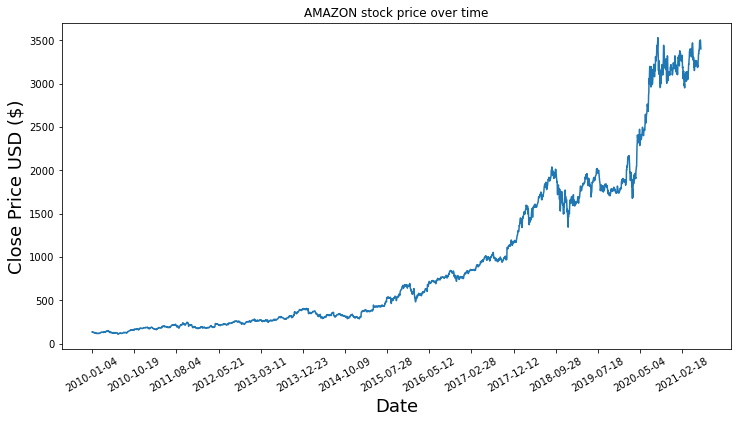

In [43]:
plt.figure(figsize=(12,6))
plt.title('AMZN data')
plt.plot(amzn_dataset["Date"], amzn_dataset["Close"])
plt.xticks(np.arange(0,2890, 200), amzn_dataset['Date'][0:2890:200],rotation=30)
plt.title("AMAZON stock price over time")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

<b> Plot AMAZON daily return </b>

In [7]:
amzn_dataset['daily return']=(amzn_dataset['Close']/amzn_dataset['Close'].shift(1))-1
amzn_dataset.head()

,Open,High,Low,Close,Adj Close,Volume,daily return
Date,,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900,NaN
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900,0.005900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800,-0.018116
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200,-0.017013
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500,0.027077


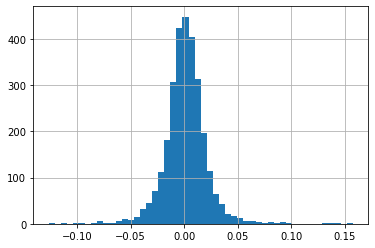

In [8]:
amzn_dataset['daily return'].hist(bins=50)

In [9]:
#the wider histogram, the higher std and variance. 

<b> Moving Averages </b>

Lets analyze the moving averages for these stocks in the year 2010-2021.
Plot the rolling 30 day average against the Close Price for Amazons stock for the years 2010 to 2021

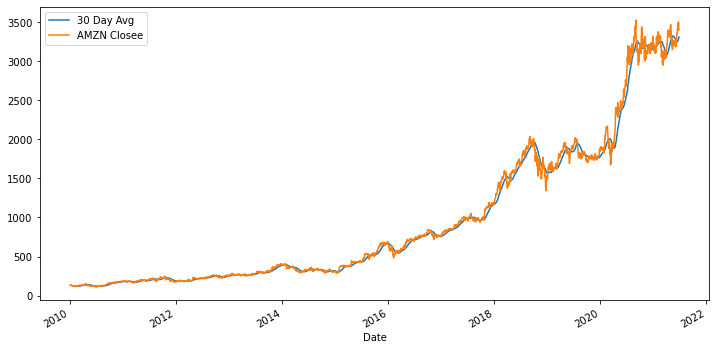

In [22]:
plt.figure(figsize=(12,6))
amzn_dataset['Close'].loc['2010-01-04':'2021-06-25'].rolling(window=30).mean().plot(label='30 Day Avg')
amzn_dataset['Close'].loc['2010-01-04':'2021-06-25'].plot(label='AMZN Closee')
plt.legend()

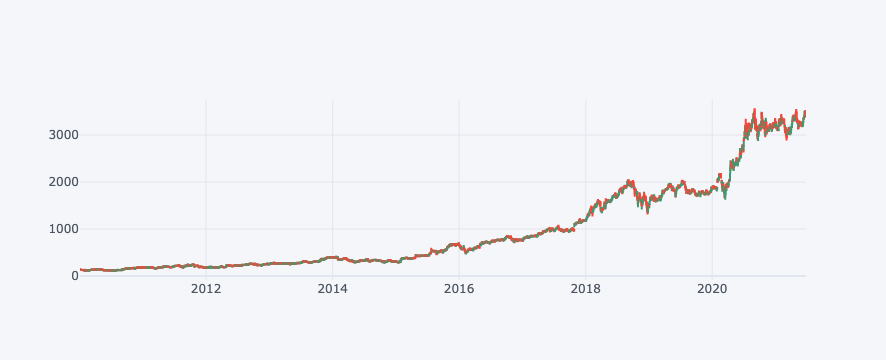

In [53]:
import plotly
import cufflinks as cf
cf.go_offline()

amzn_dataset[['Open', 'High', 'Low', 'Close']].loc['2010-01-04':'2021-06-25'].iplot(kind='candle')